In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas,tensorflow,keras

Sat Nov 03 2018 

CPython 3.6.7
IPython 7.1.1

numpy 1.15.3
scipy 1.1.0
sklearn 0.20.0
pandas 0.23.4
tensorflow 1.11.0
keras 2.2.4

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


Using TensorFlow backend.


In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
from IPython.display import Image
sns.set(style="darkgrid")
PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir))
sys.path.append(os.path.join(PROJECT_ROOT, 'src'))
print(PROJECT_ROOT)

/home/mirror/PycharmProjects/ImageAI-opencv


In [13]:
from data.image_detection import DETECTORS, ImageDetector
# detectors initialization
detectors = {k: ImageDetector(k) for k in DETECTORS}

{'resnet50': ImageDetector(name='resnet50', models_path='/home/mirror/PycharmProjects/ImageAI-opencv/src/../data/external', results_path='/home/mirror/PycharmProjects/ImageAI-opencv/src/../data/processed', probability=30, last_result=None, last_saved=None, processing_time=None, custom_objects=[], detector_model_map={'resnet50': {'model': 'resnet50_coco_best_v2.0.1.h5', 'type': 'setModelTypeAsRetinaNet'}, 'yolo': {'model': 'yolo.h5', 'type': 'setModelTypeAsYOLOv3'}, 'yolo-tiny': {'model': 'yolo-tiny.h5', 'type': 'setModelTypeAsTinyYOLOv3'}}, detector=<imageai.Detection.ObjectDetection object at 0x7fa68d1e0c18>, serialized_fields=['name', 'last_result', 'last_saved', 'processing_time']),
 'yolo': ImageDetector(name='yolo', models_path='/home/mirror/PycharmProjects/ImageAI-opencv/src/../data/external', results_path='/home/mirror/PycharmProjects/ImageAI-opencv/src/../data/processed', probability=30, last_result=None, last_saved=None, processing_time=None, custom_objects=[], detector_model_

In [16]:
for detector in detectors.values():
    detector.run(f"{PROJECT_ROOT}/data/interim/road_camera_640x480_0-17.jpeg")

In [17]:
sorted((d.name, d.processing_time) for d in detectors.values())

[('resnet50', 27.425049781799316),
 ('yolo', 5.067710638046265),
 ('yolo-tiny', 3.8226158618927)]

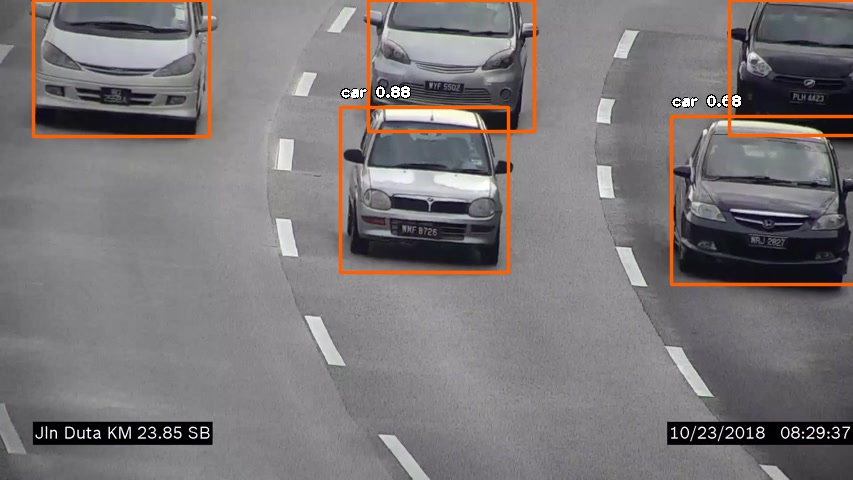

In [18]:
# result of fastest one
Image(detectors['yolo-tiny'].last_saved)

Not bad detection, but very slow for realtime, let's do something with it